# Regression and K Nearest Neighbors

This session involves the following things:

1. Regression Analysis on the Diabetes Data Set:
    * Fiting and evaluation
    * Discussion on least squares regression
    * Discussion of the R2 coefficient and improvement
    * How to split a data set int training and testing data
2. Classification of a Hand-written digits dataset
    * K-nearest neighbors classifier
    * Evaluating the model

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###  1. Diabetes Data Set

#### Instantiate the Model

(ask how to insert hyperlinks and typeset equations into the notebook!)

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabeetus = load_diabetes()

In [4]:
diabeetus.keys()

['data', 'target']

The object.keys() syntax tells us the first hierarchy in which the object is subdivided.

In [5]:
X = diabeetus.data
y = diabeetus.target

#### Fit and Evaluation

In [6]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
linear_score = reg.score(X,y)
linear_score

0.51774942541329338

'Score' denotes the R2 coefficient, which tells us how successfull the linear regression was at fitting the data.

#### Justifying the Model

In what follows we shall examine the behavior of the algorithms used:

* .fit uses least squares to compute the coefficients of the linear model

In [10]:
reg.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [11]:
reg.intercept_

152.13348416289651

Let's carry out the computation manually! Given a data set with $n$ samples and $m$ features

$$ \begin{align}
(x_{1,1}, x_{1,2}, ..., x_{1,m}, y_1) , (x_{2,1}, x_{2,2}, ..., x_{2,m}, y_2) ... (x_{n,1}, x_{n,2}, ..., x_{n,m}, y_n)
\end{align}
$$

we want to obtain a linear model

$$ \begin{align}
y = a_0 + a_1X_1 + ... + a_mX_m $
\end{align}
$$
by direct application of the least squares linear regression model:

$$ \begin{align}
A = (X^TX)^{-1}X^ty
\end{align}
$$
wherein

$$
\begin{align}
X =
\begin{bmatrix}
    1 & x_{1,1} & x_{1,2} & \dots & x_{1,m} \\
    1 & x_{2,1} & x_{2,2} & \dots & x_{2,n} \\
 \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n,1} & x_{n,2} & \dots & x_{n,m}
\end{bmatrix}
\
y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ \ y_n
\end{bmatrix}
\
A = \begin{bmatrix}
a_0 \\ a_1 \\ \vdots \\ \ a_m
\end{bmatrix}
\
\end{align}
$$

Let us compute these quantites manually using NumPy

In [12]:
Xm = np.matrix(np.hstack((np.ones(442).reshape(442,1),X))) # Array X as a NumPy matrix
ym = np.matrix(y).T # Array y as a NumPy matrix

In [13]:
A = (Xm.T * Xm)**(-1) * Xm.T*ym # Compute the coefficients

In [14]:
A

matrix([[ 152.13348416],
        [ -10.01219782],
        [-239.81908937],
        [ 519.83978679],
        [ 324.39042769],
        [-792.18416163],
        [ 476.74583782],
        [ 101.04457032],
        [ 177.06417623],
        [ 751.27932109],
        [  67.62538639]])

We've thus verified that our coefficients are the same as the intercept and coefficients computed by .fit

Let's take a closer look at the $R^2$ coefficient. It is defined by

$$
\begin{align}
R^2 = 1- \frac{\sum_i (y_i - \widehat{y}_i)^2}{\sum_i (y_i - \overline{y})^2}
\end{align}
$$

In the above equation, $\widehat{y}_i$ denotes the predicted values from the model using reg.predict() while $\overline{y}$ denotes the mean.

This statistic is used in models aimed at either predicting future outcomes or testing hypotheses on the basis of other related information. It measures how well observed outcomes are reproduced by the model based on the proportion of total variation of outcomes in the model.

In [16]:
R2 = 1 - np.sum((y - reg.predict(X))**2)/np.sum((y-np.mean(y))**2)
R2

0.51774942541329338

This is the same value given by reg.score(X,y) !

#### Refining R2.

In order to improve the score of our model, we will experiment with the data. Instead of doing a linear regression, we'll use the **squares** of the variables so as to have a quadratic model:

In [34]:
Xnew = np.hstack((X,X**2)) # New feature array exhibits 20 features

In [35]:
Xnew.shape

(442L, 20L)

In [36]:
X.shape

(442L, 10L)

In [37]:
reg.fit(Xnew,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
quadratic_score = reg.score(Xnew,y)
quadratic_score

0.54615964594306987

In [40]:
abs(quadratic_score - linear_score)

0.028410220529776486

This is how much the fit improved by.
Q: How does this compare to doing Taylor Expansions? How much does this compare to Volterra Series?

#### Splitting the dataset

Once more, the data was evaluated using the same data to train the model. From now on, we'll make sure to *split* the data set into a training subset and a testing subset.

In [50]:
num_samples = 300
X_train = Xnew[:num_samples,:]
X_test = Xnew[num_samples:,:]
y_train = y[:num_samples]
y_test = y[num_samples:]

Xnew has 442 elements, X_train has 300 and X_test has 142. It makes a lot of sense to use less elements as the testing data set than as the training data set.

In [51]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
reg.score(X_test,y_test)

0.48868400155663394

That being said, sklearn has a method for randomly splitting the data into a training set and a testing set.
Q: Why split data randomly? Law of large numbers...

In [53]:
from sklearn.cross_validation import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(Xnew,y,test_size=0.3)

In [58]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
reg.score(X_test,y_test)

0.47006730274286984

Interesting! Note that my score was different from the one carried out in the demonstration, whereas the manual score was the same in both cases. This settles the question of how many members should be in the training set compared to in the testing set.

In [74]:
len(Xm)  == len(ym)

True

### 2. Hand-written digits dataset

The puzzle to be considered this time involves using the data to create a model capable of predicting the correct digit for a new image sample.

In [87]:
from sklearn.datasets import load_digits

In [88]:
digits = load_digits()

In [89]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [90]:
images = digits.images

In [91]:
images.shape

(1797L, 8L, 8L)

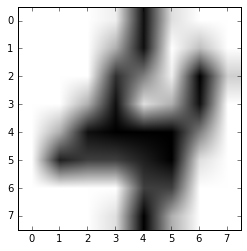

In [93]:
plt.imshow(images[1001,:,:], cmap='binary');

The images array is a 3D array where, for each index *i*, the 2d array images[i,:,;] is a numeric array representing an 8 by 8 pixel image of a hand-written digits. In this case we have a *4*

In [94]:
images[1001,:,:]

array([[  0.,   0.,   0.,   1.,  15.,   2.,   0.,   0.],
       [  0.,   0.,   0.,   5.,  15.,   0.,   4.,   0.],
       [  0.,   0.,   0.,  13.,   8.,   1.,  16.,   3.],
       [  0.,   0.,   5.,  15.,   2.,   5.,  15.,   0.],
       [  0.,   5.,  15.,  16.,  16.,  16.,   8.,   0.],
       [  0.,  14.,  12.,  12.,  14.,  16.,   2.,   0.],
       [  0.,   0.,   0.,   0.,  12.,  12.,   0.,   0.],
       [  0.,   0.,   0.,   2.,  16.,   5.,   0.,   0.]])

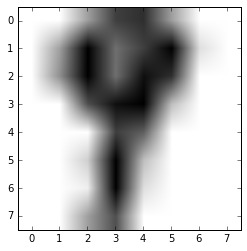

In [98]:
plt.imshow(images[69,:,:],cmap='binary');

In [99]:
images[69,:,:]

array([[  0.,   0.,   6.,  12.,  13.,   6.,   0.,   0.],
       [  0.,   6.,  16.,   9.,  12.,  16.,   2.,   0.],
       [  0.,   7.,  16.,   9.,  15.,  13.,   0.,   0.],
       [  0.,   0.,  11.,  15.,  16.,   4.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   3.,  16.,   4.,   0.,   0.,   0.],
       [  0.,   0.,   1.,  16.,   2.,   0.,   0.,   0.],
       [  0.,   0.,   6.,  11.,   0.,   0.,   0.,   0.]])

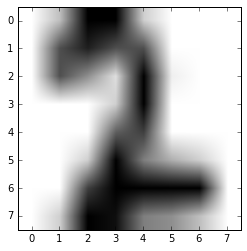

In [97]:
plt.imshow(images[1492,:,:],cmap='binary');

In [100]:
images[1492,:,:]

array([[  0.,   4.,  16.,  16.,   3.,   0.,   0.,   0.],
       [  0.,  11.,  14.,  11.,  11.,   0.,   0.,   0.],
       [  0.,  11.,   7.,   2.,  16.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   3.,  16.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  10.,  12.,   0.,   0.,   0.],
       [  0.,   0.,   3.,  16.,   8.,   5.,   3.,   0.],
       [  0.,   0.,  12.,  16.,  16.,  16.,  16.,   0.],
       [  0.,   3.,  16.,  15.,   8.,   7.,   4.,   0.]])

This one is a 2. Coooooooool!!!!!

#### K-nearest neighbors classifier

Given the set of known digits in a 64-dimensional space, look at the sample as a new point and look at the labels of the K-nearest points in the 'training set' so as to predict the correct label.

This type of algorithm stores instances of the training data instead of constructing a general internal model. In the KNeighborsClassifier algorithm, $k$ is an integer value chosen by the user. Classification is completed from a majority vote of the nearest neighbors at each point.

In [102]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [103]:
clf = KNN(n_neighbors = 10)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [105]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [106]:
clf.score(X_test,y_test)

0.97962962962962963

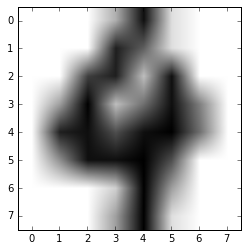

In [107]:
plt.imshow(X_test[10,:].reshape(8,8),cmap='binary')

In [108]:
clf.predict(X_test[10,:].reshape(1,64))

array([4])

Sweet jesus! This model is 97.6% accurate in predicting the value of the number!

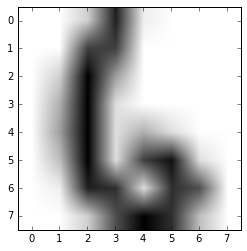

In [109]:
plt.imshow(X_train[11,:].reshape(8,8),cmap='binary')

In [112]:
clf.predict(X_train[11,:].reshape(1,64))

array([6])